In [1]:
from src.Data.MakeDataset import MakeDataset
from src.Models.train import train
from src.Models.prediction import test
import Alarms
import pandas as pd
import joblib
%matplotlib inline
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

sns.set(style='whitegrid',palette='muted',font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()


# Make Dataset

Detailed analysis on the data can be found on the notebooks where step by step is descibed the procedure followed to clean and process the data along with visualisations

In [2]:
make_data = MakeDataset(siteid=89244,missing_thres=0.5,group='freezer',
                datapath='Data\Processed\HACCP.csv',
                temppath = 'Data\Processed\Temp.csv',
                censorspath = 'Data\Processed\S3S4.csv',
                sitepath = 'Data\Raw\Dinosol_Site_Information.csv')

In [3]:
make_data.make_dataset()

Start creating the dataset
haccp (2139222, 11)
Shape before cleaning (51986, 43)
Shape after cleaning (51986, 43)
Classes labeled


Saving train and test sets
finish processing data
Dataset created


# Training models

In [4]:
train_models =  train(datapath='Data\Processed\Temp.csv_freezer_Train.pkl', assetspath='Data\Processed\89244_freezer_assets.csv',siteid=89244)


In [5]:
train_models.training()

2021-11-28 17:11:02,591 - src.Models.train - INFO - Training a classifier for anomaly classification


Start training
['010:C.Congelados', '019:I.Congelados 2.2', '014:I.Congelados 1.2', '017:C.I.Congelados 4', '016:C.I.Congelados 2', '012:C.Pan Congelado', '015:I.Congelados 1.3', '018:I.Congelados 2.1', '022:A.Tartas', '013:I.Congelados 1.1', '020:I.Congelados 2.3', '011:A.Pescado', '021:C.I.Congelados 3']


2021-11-28 17:11:16,479 - root - INFO -   Algorithm   F1_mean
0       SVM  0.916207
1        RF  0.969672
2       ANN  0.971547
3       KNN  0.588144
2021-11-28 17:11:16,483 - root - INFO - The best model2    ANN
Name: Algorithm, dtype: object
2021-11-28 17:11:30,151 - root - INFO -   Algorithm   F1_mean
0       SVM  0.952944
1        RF  0.975343
2       ANN  0.973892
3       KNN  0.766072
2021-11-28 17:11:30,153 - root - INFO - The best model1    RF
Name: Algorithm, dtype: object
2021-11-28 17:11:41,826 - root - INFO -   Algorithm   F1_mean
0       SVM  0.967211
1        RF  0.982949
2       ANN  0.965700
3       KNN  0.912572
2021-11-28 17:11:41,827 - root - INFO - The best model1    RF
Name: Algorithm, dtype: object
2021-11-28 17:11:49,134 - root - INFO -   Algorithm  F1_mean
0       SVM   1.0000
1        RF   1.0000
2       ANN   1.0000
3       KNN   0.9876
2021-11-28 17:11:49,137 - root - INFO - The best model0    SVM
1     RF
2    ANN
Name: Algorithm, dtype: object
2021-11-28 17

Done training


# Test Model

In [6]:
test_model = test(siteid=89244,
                  datapath='Data\Processed\Temp.csv_freezer_Test.pkl',
                  assetspath= 'Data\Processed\89244_freezer_assets.csv',
                  group='freezer')

In [7]:
test_model.testing()

2021-11-28 17:14:39,178 - src.Models.prediction - INFO - Predictions from the classifier on test data
2021-11-28 17:14:39,179 - src.Models.prediction - INFO - Start testing
2021-11-28 17:14:39,227 - root - INFO - f1 score on test data [1.         0.96016771 1.         1.         0.9847619  0.99240506]
2021-11-28 17:14:39,353 - root - INFO - f1 score on test data [1.         0.94609164 1.         1.         0.99173554 0.91666667
 0.78571429 0.875     ]
2021-11-28 17:14:39,447 - root - INFO - f1 score on test data [1.         0.96925859 1.         1.         0.99275362 1.
 0.88135593 0.57142857]
2021-11-28 17:14:39,531 - root - INFO - f1 score on test data [1.         0.997921   1.         1.         1.         1.
 0.88888889 1.        ]
2021-11-28 17:14:39,621 - root - INFO - f1 score on test data [1.         0.9958159  1.         1.         1.         1.
 0.98888889 1.        ]
2021-11-28 17:14:39,718 - root - INFO - f1 score on test data [1.         0.9958159  1.         1.         1.

In [4]:
final = pd.read_csv('Data\Processed\89247_freezer_Final.csv',index_col=0)
final

,011:CB CONG Hielo,Consecutive011:CB CONG Hielo,Status_011:CB CONG Hielo,011:CB CONG Hielo: u16 S4 Air Temp,012:I CONG PLS,Consecutive012:I CONG PLS,Status_012:I CONG PLS,012:I CONG PLS: u16 S4 Air Temp,023:I CONG Pescaderia,Consecutive023:I CONG Pescaderia,...,Status_014:CB CONG Ave,014:CB CONG Ave: u16 S4 Air Temp,018:I CONG Verdura,Consecutive018:I CONG Verdura,Status_018:I CONG Verdura,018:I CONG Verdura: u16 S4 Air Temp,019:CB CONG Pescado,Consecutive019:CB CONG Pescado,Status_019:CB CONG Pescado,019:CB CONG Pescado: u16 S4 Air Temp
Timetag,,,,,,,,,,,,,,,,,,,,,
2020-09-01 00:05:00,-17.9,0.0,Normal,-21.5,-19.6,0.0,Normal,-22.4,-19.6,0.0,...,Defrost,-16.2,-21.2,-1.0,anomaly_close_below,-25.1,-18.8,0.0,Normal,-23.3
2020-09-01 00:15:00,-18.9,0.0,Normal,-22.4,-21.8,-1.0,anomaly_close_below,-25.5,-20.5,0.0,...,Defrost,-15.9,-20.4,0.0,Normal,-23.4,-18.2,0.0,Normal,-22.0
2020-09-01 00:25:00,-18.9,0.0,Normal,-22.8,-22.1,-2.0,anomaly_close_below,-26.2,-20.2,0.0,...,anomaly_close_above,-14.7,-20.7,0.0,Normal,-23.8,-18.2,0.0,Normal,-22.4
2020-09-01 00:35:00,-19.9,0.0,Normal,-24.1,-22.5,-3.0,anomaly_close_below,-27.1,-19.2,0.0,...,anomaly_close_above,-15.4,-21.5,-1.0,anomaly_close_below,-24.8,-19.2,0.0,Normal,-23.4
2020-09-01 00:45:00,-20.2,0.0,Normal,-24.1,-21.5,-4.0,anomaly_close_below,-25.2,-18.8,0.0,...,anomaly_close_above,-16.3,-22.3,-2.0,anomaly_close_below,-25.9,-20.2,0.0,Normal,-24.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30 23:15:00,-21.9,-4.0,anomaly_close_below,-25.6,-25.2,-15.0,anomaly_close_below,-27.7,-18.7,0.0,...,Normal,-24.7,-26.6,-39.0,anomaly_close_below,-29.3,-18.9,0.0,Normal,-23.7
2021-08-30 23:25:00,-20.9,0.0,Normal,-24.0,-21.6,-16.0,anomaly_close_below,-23.2,-19.7,0.0,...,Normal,-20.6,-25.0,-40.0,anomaly_close_below,-26.7,-18.6,0.0,Normal,-22.9
2021-08-30 23:35:00,-21.3,-1.0,anomaly_close_below,-25.2,-25.0,-17.0,anomaly_close_below,-27.2,-21.1,-1.0,...,Normal,-23.1,-27.1,-41.0,anomaly_close_below,-29.9,-17.9,0.0,Normal,-22.3


# Alarms

In [10]:
Alarms.alarms(1231,'freezer','Data\Processed\89244_freezer_Final.csv','Data\Processed\\temp_groups.csv','Data\Processed\89244_freezer_assets.csv',type='--- High Temp.')

Assets before ['010:C.Congelados', '019:I.Congelados 2.2', '014:I.Congelados 1.2', '017:C.I.Congelados 4', '016:C.I.Congelados 2', '012:C.Pan Congelado', '015:I.Congelados 1.3', '018:I.Congelados 2.1', '022:A.Tartas', '013:I.Congelados 1.1', '020:I.Congelados 2.3', '011:A.Pescado', '021:C.I.Congelados 3']
Difference of first and second String: set()
First and Second list are Equal
Assets after ['010:C.Congelados', '019:I.Congelados 2.2', '014:I.Congelados 1.2', '017:C.I.Congelados 4', '016:C.I.Congelados 2', '012:C.Pan Congelado', '015:I.Congelados 1.3', '018:I.Congelados 2.1', '022:A.Tartas', '013:I.Congelados 1.1', '020:I.Congelados 2.3', '011:A.Pescado', '021:C.I.Congelados 3']


# End Reslts

In [11]:
predictions = joblib.load('Data\Processed\89244_freezer_predcitions.pkl')
actual = joblib.load('Data\Processed\Temp.csv_freezer_Train.pkl')
assets= pd.read_csv('Data\Processed\89244_freezer_assets.csv',index_col=0)
alarms = joblib.load('Data\Processed\\1231_freezer_empty_alarms.pkl')

In [12]:
assets= assets.iloc[:,0].to_list()

0


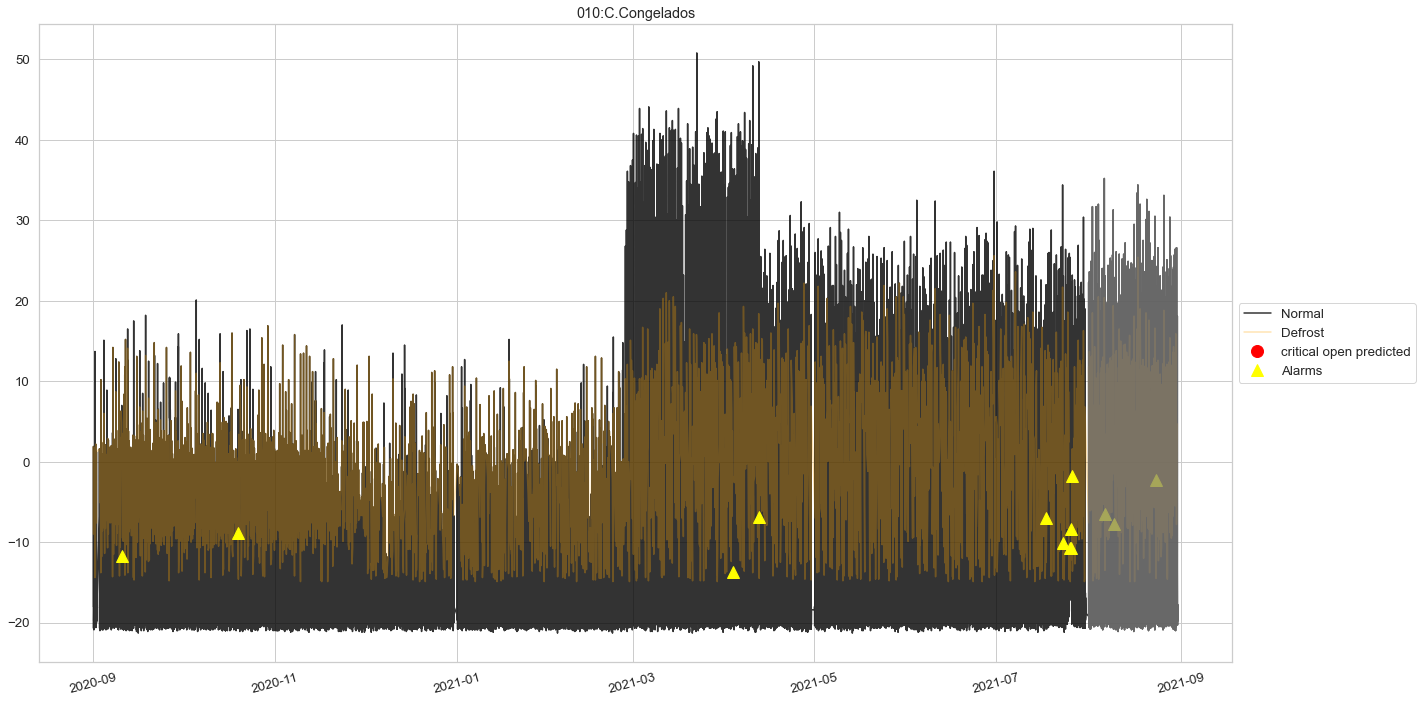

1


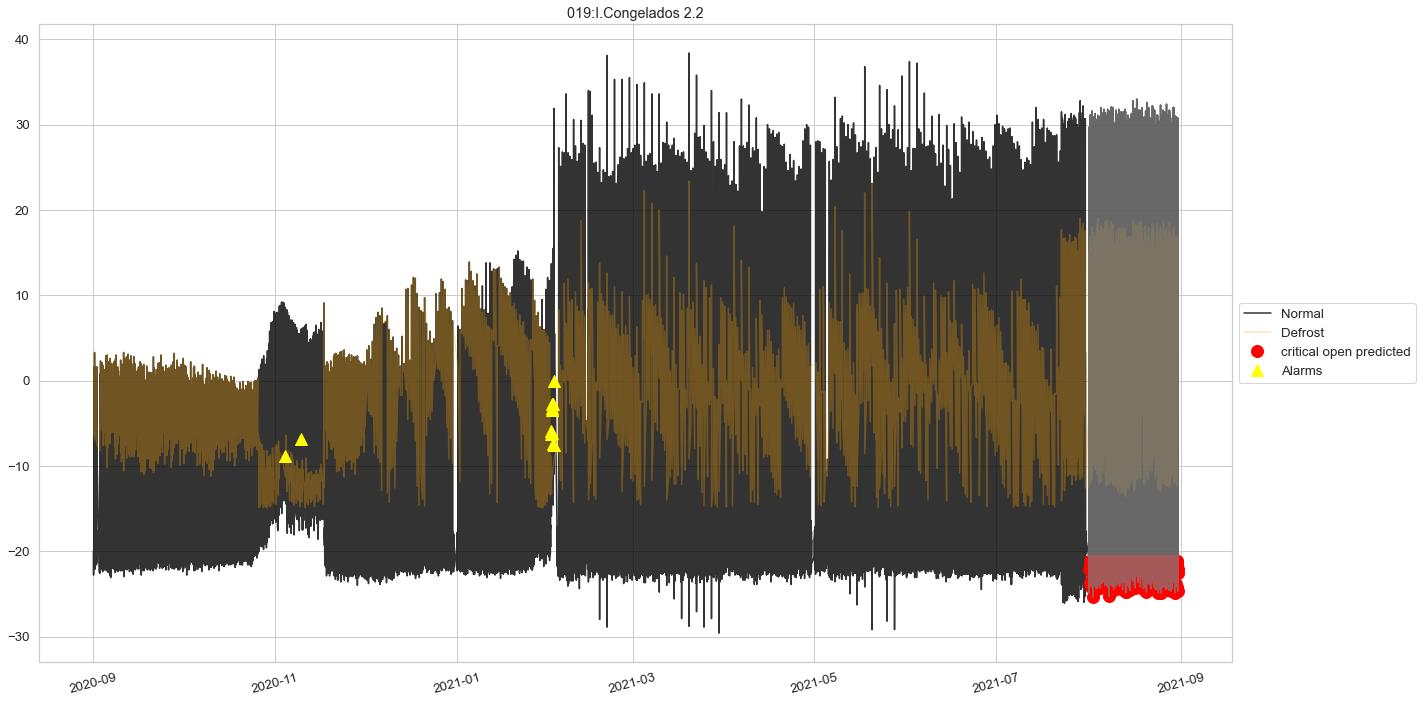

2


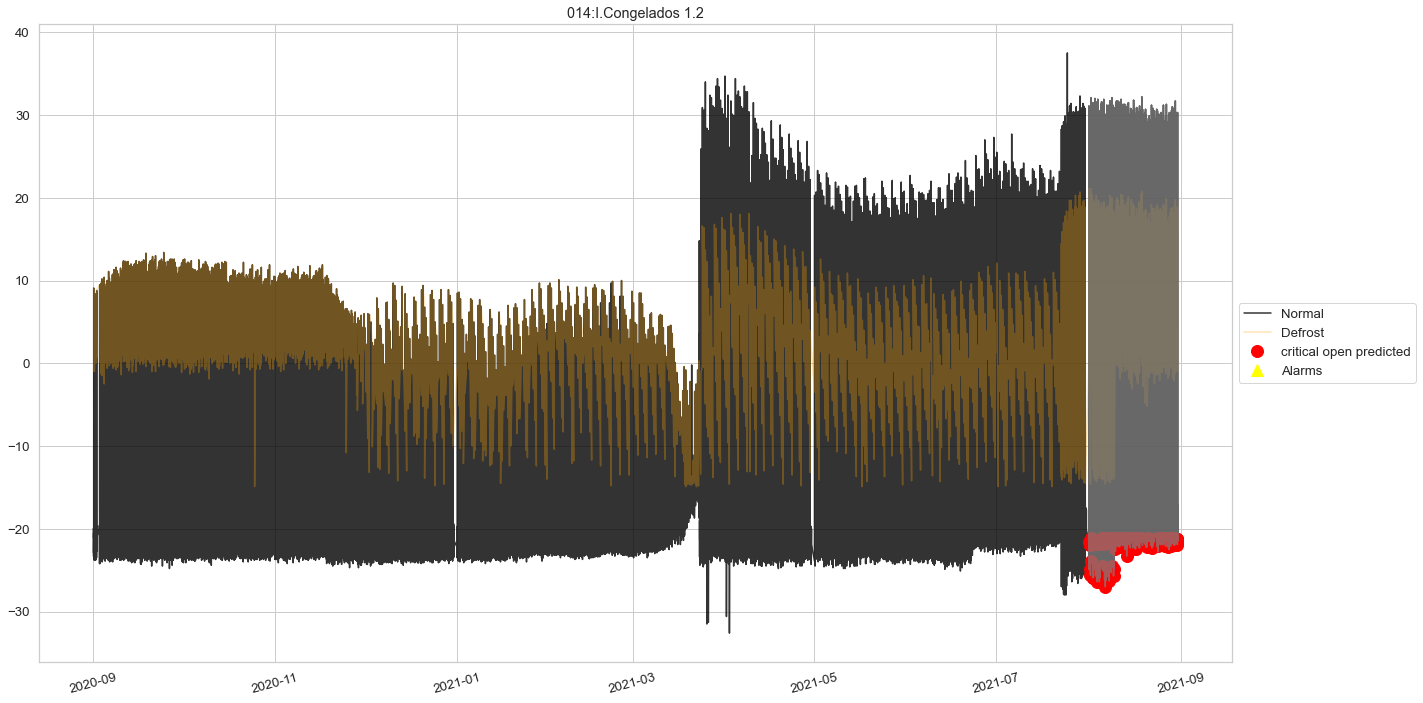

3


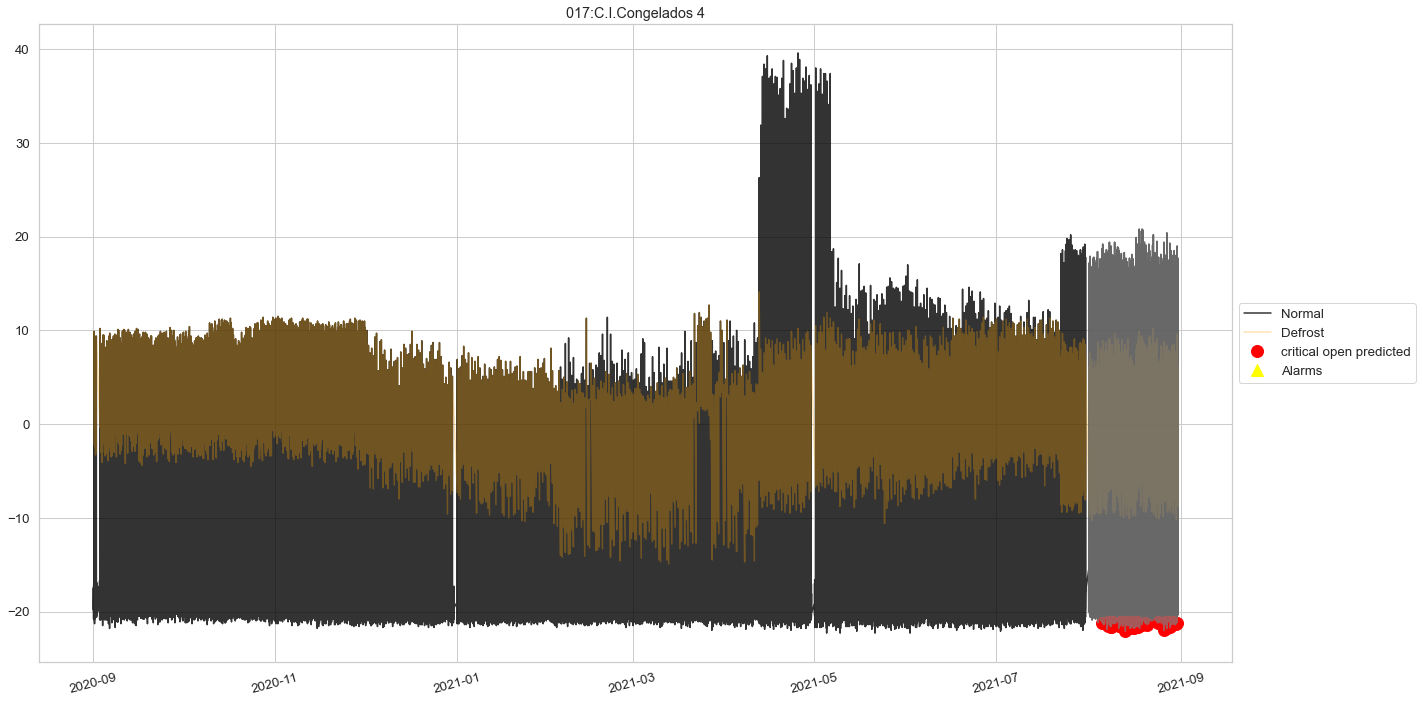

4


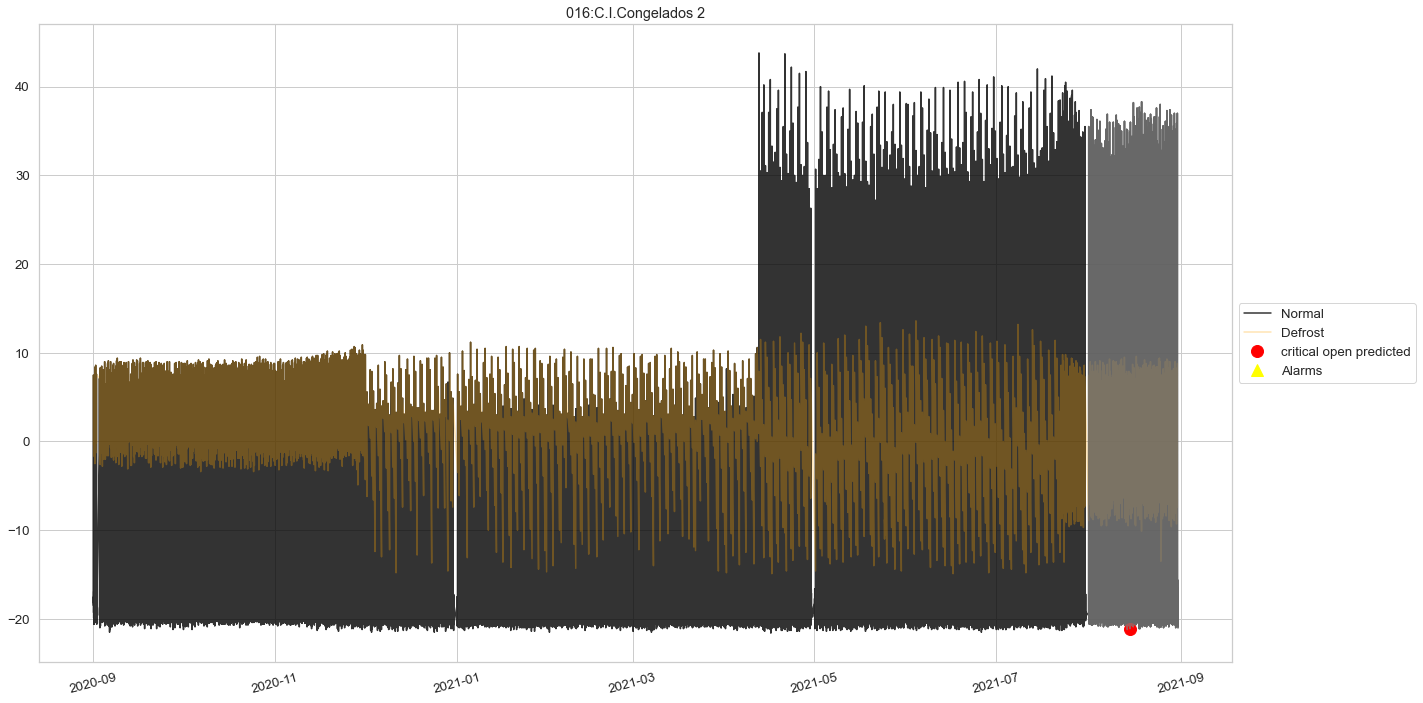

5


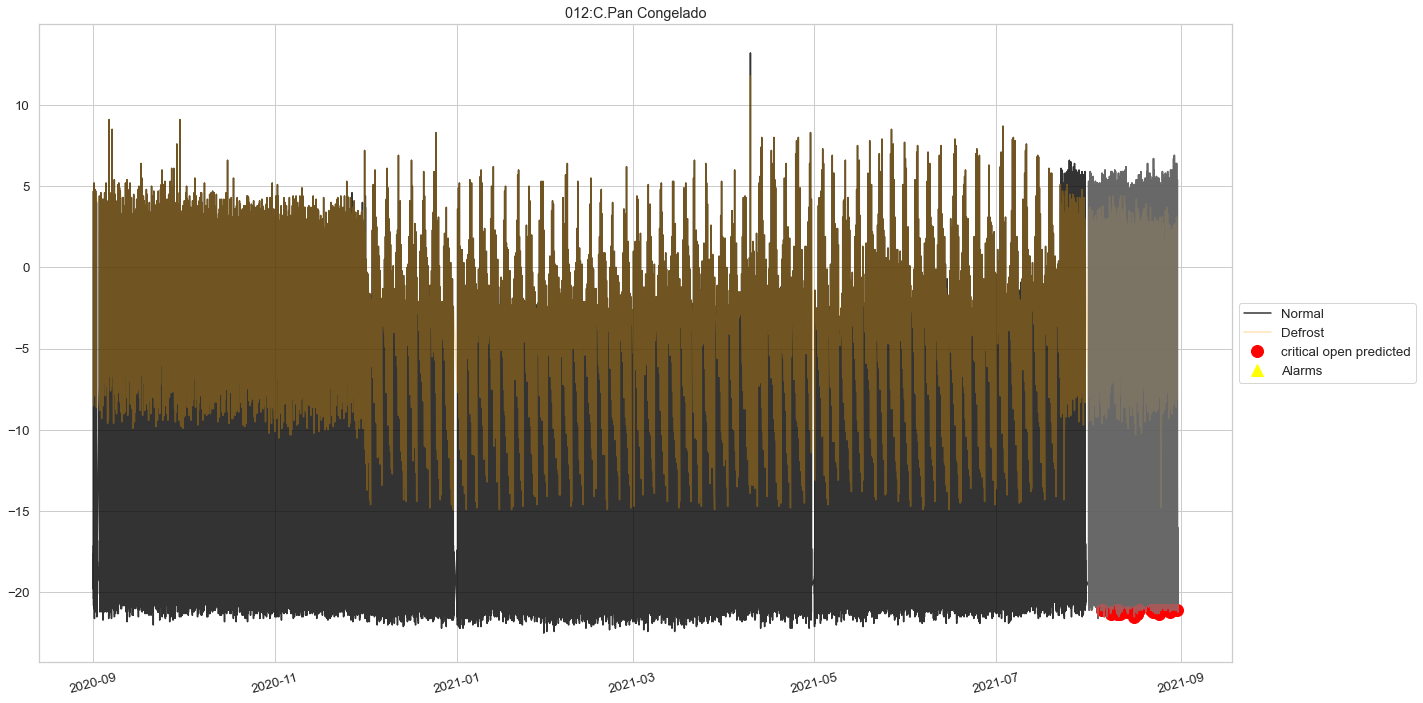

6


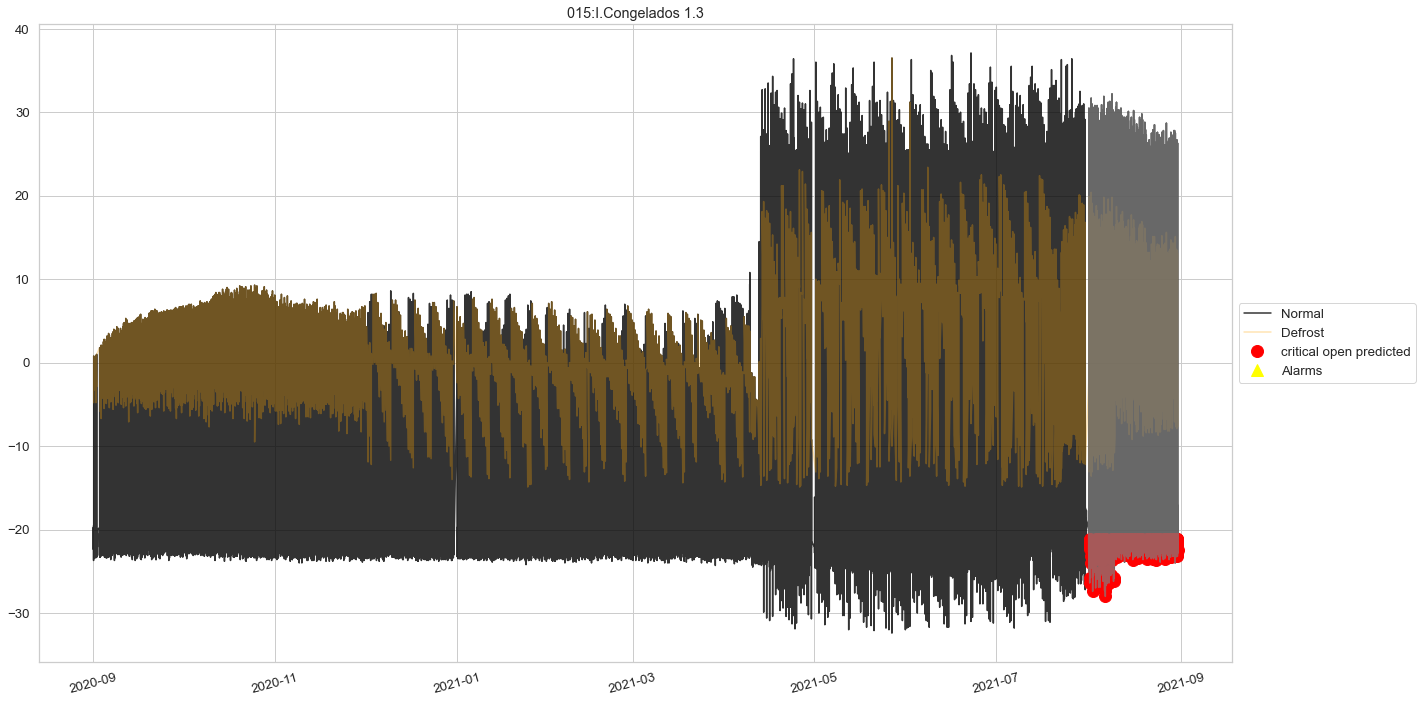

7


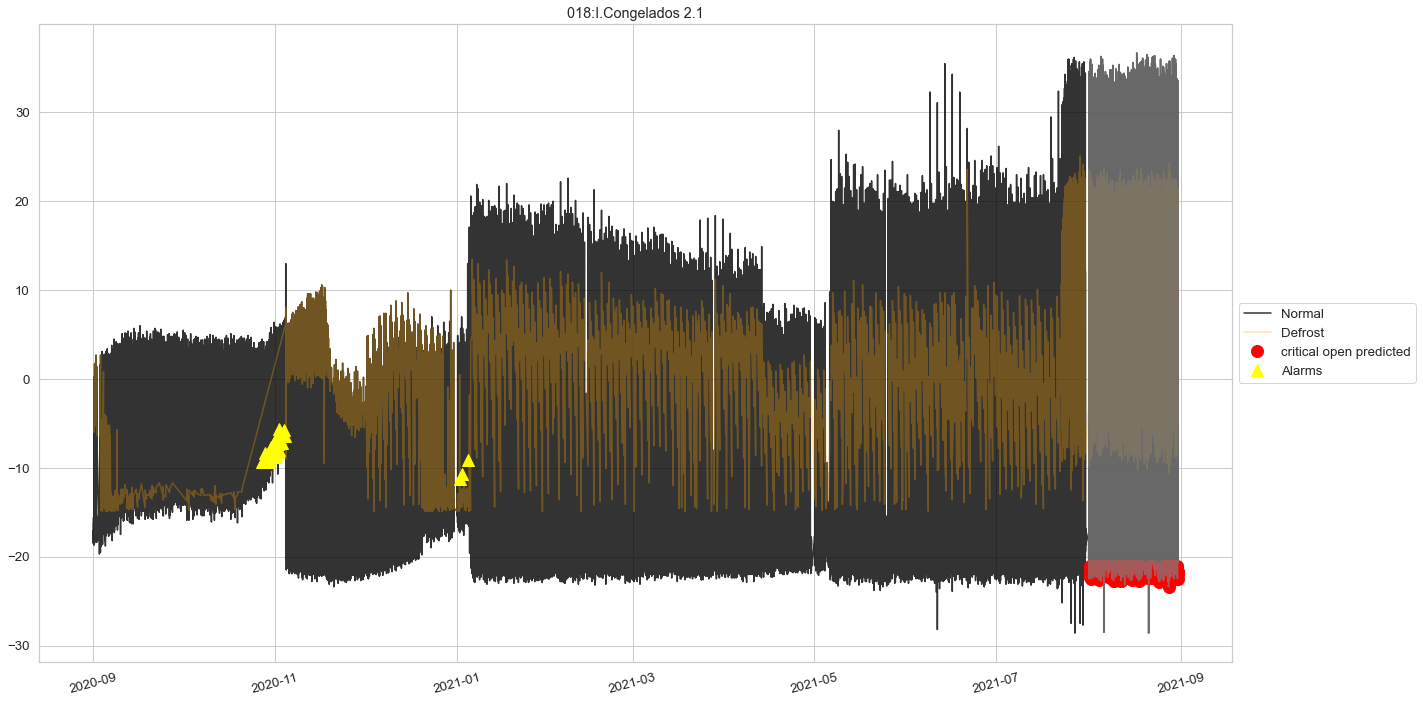

8


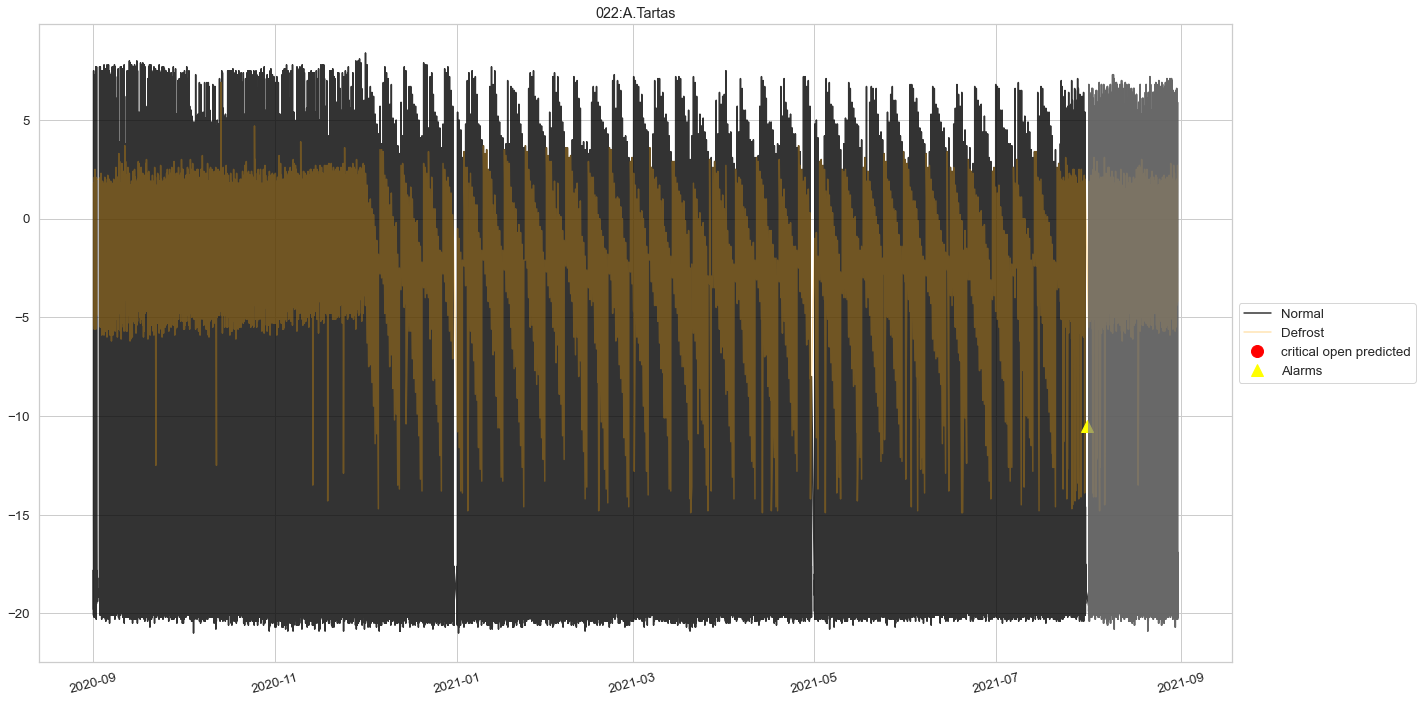

9


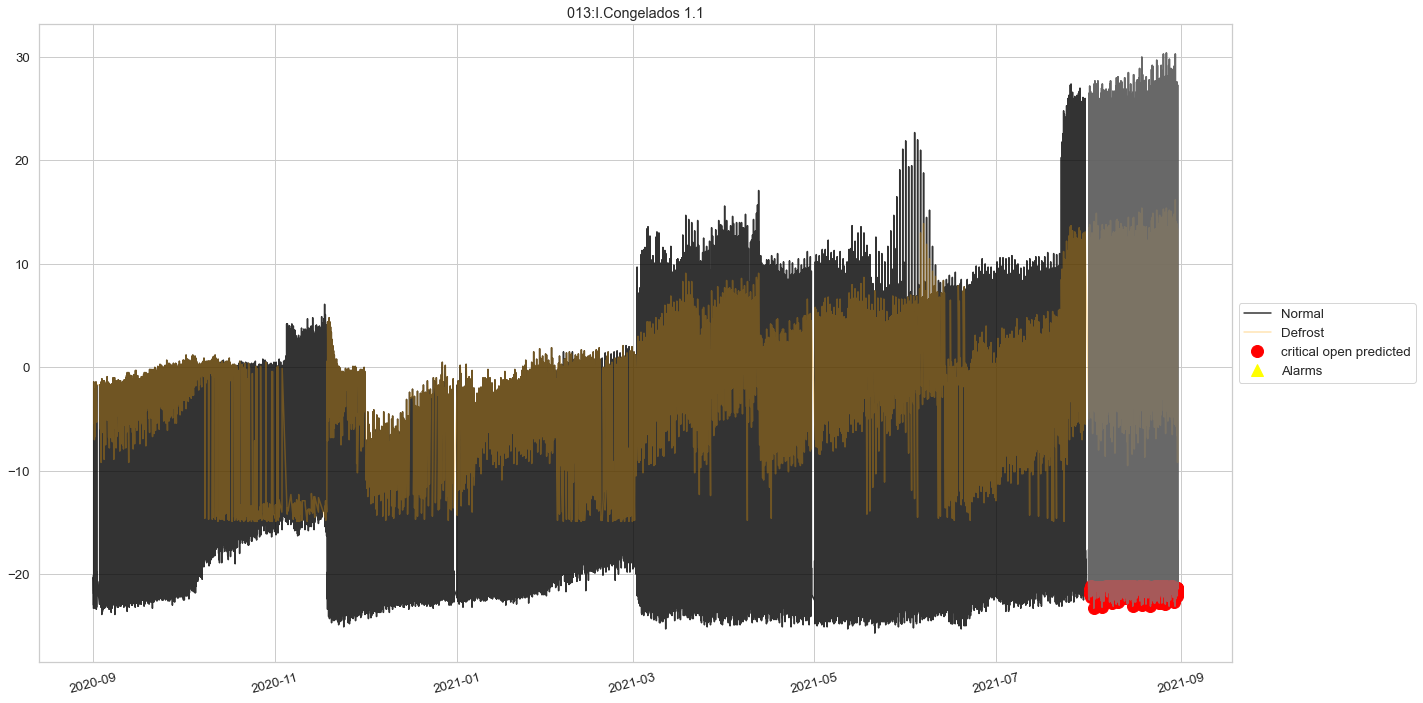

10


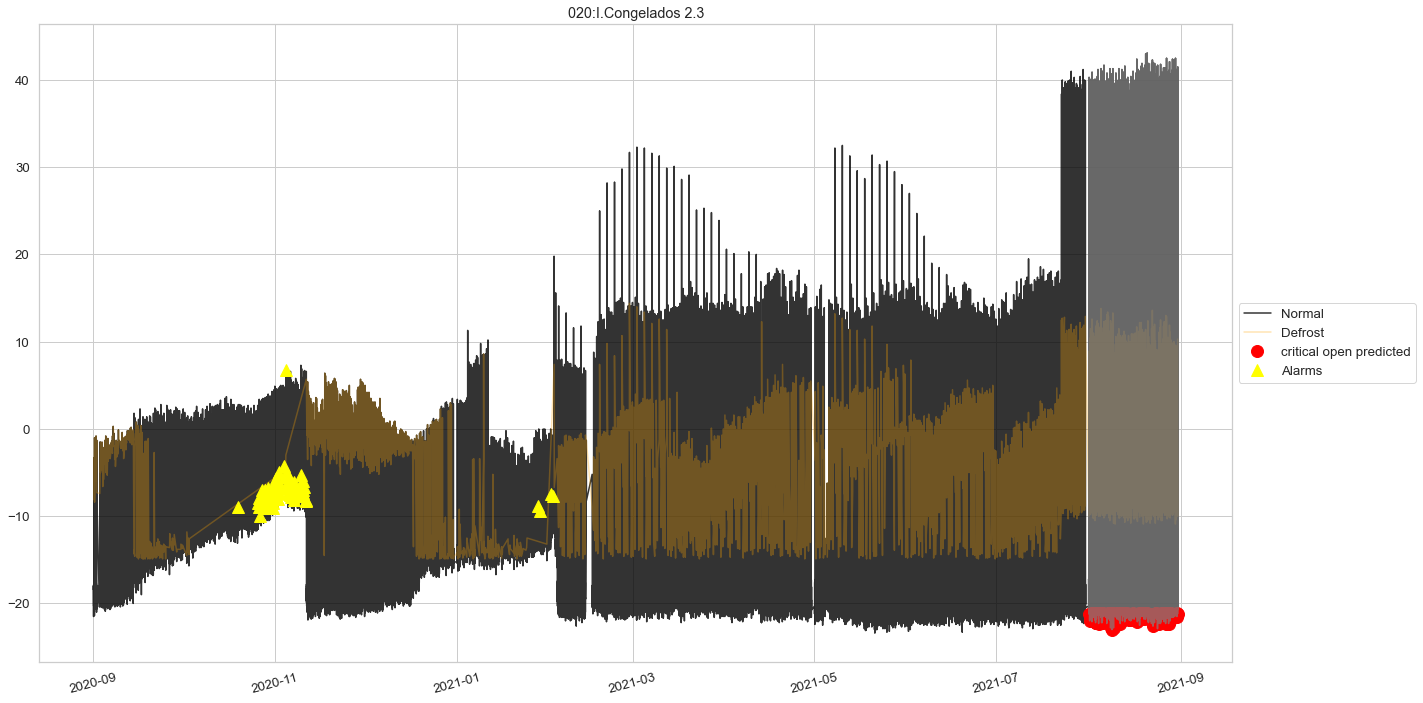

11


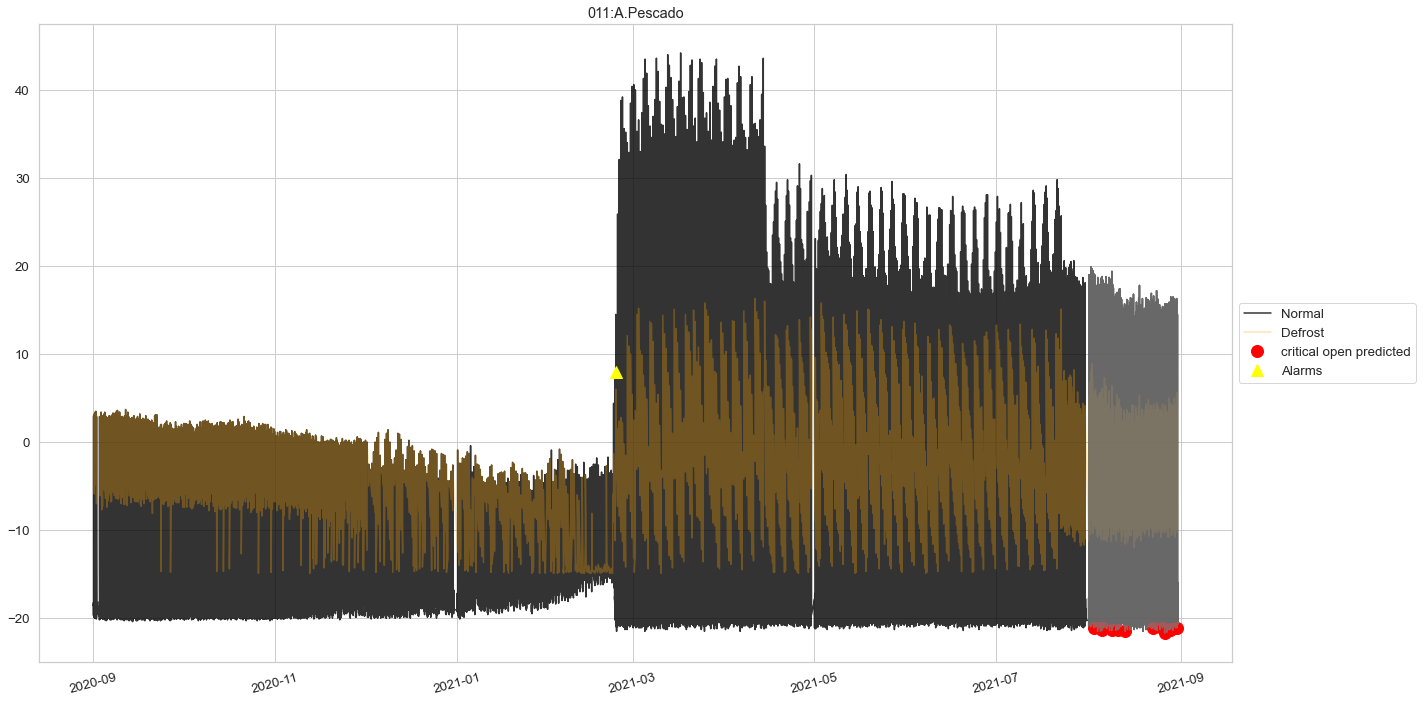

12


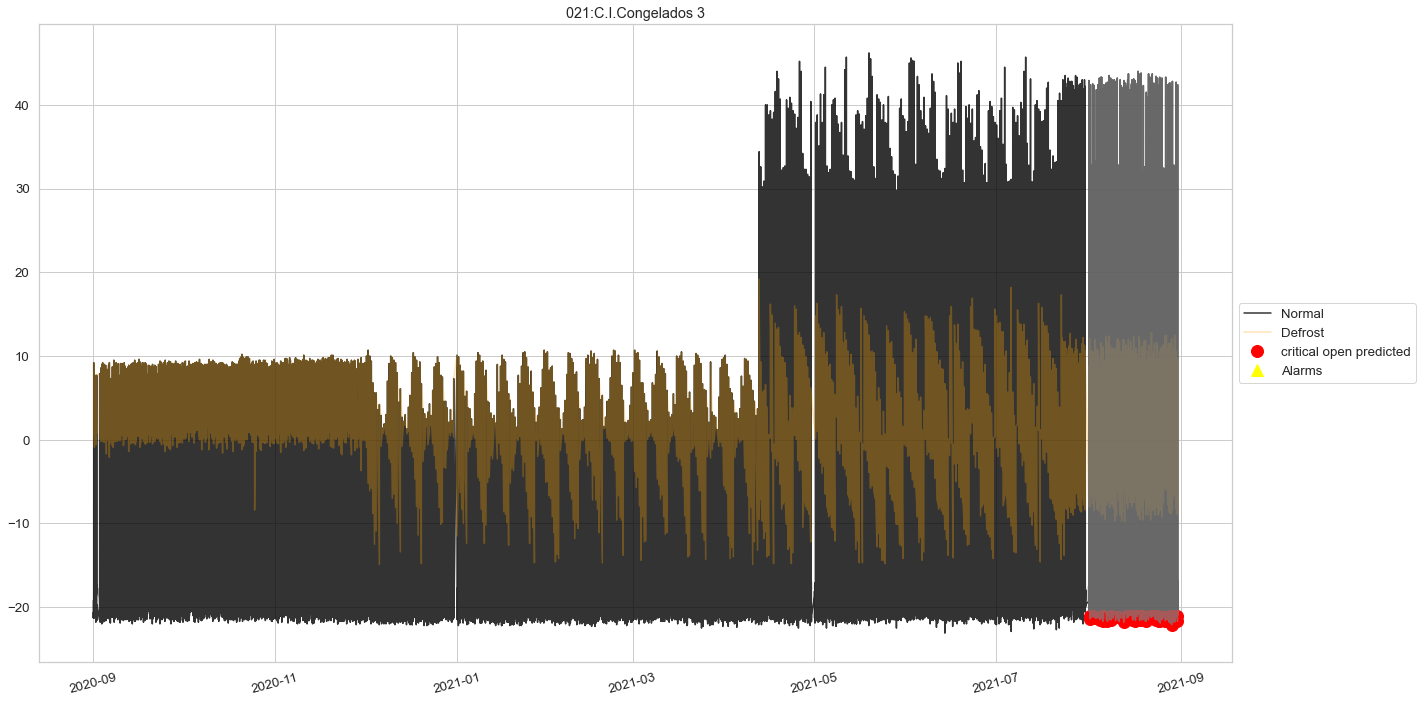

In [17]:
for i,j in enumerate(assets):
    print(i)

    predictions[i]['test']='test'
    # predictions[i] = predictions[i].set_index('Timetag')

    final_show = pd.concat([actual[i],predictions[i]],axis=0)
    fig,ax = plt.subplots(figsize=(20,10))
    ax.plot(final_show.index.values,final_show.iloc[:,0], color='black',label='Normal', alpha=0.8) #initial classes
    ax.plot(final_show[final_show['Status_'+j]==1].iloc[:,0],  color='orange', alpha=0.3,label='Defrost')#initial classes

    
    ax.plot(final_show[final_show['predictions']==2].iloc[:,0],linestyle='none', marker='o', color='red', markersize=12,label='critical open predicted')#initial classes
    # ax.plot(final_show[final_show['predictions']==3].iloc[:,0],linestyle='none', marker='*', color='red', markersize=12,label='critical close predicted')#initial classes
    # ax.plot(final_show[final_show['predictions']==4].iloc[:,0],linestyle='none', marker='D', color='green', markersize=12,label='No critical open predicted')#initial classes
    # ax.plot(final_show[final_show['predictions']==5].iloc[:,0],linestyle='none', marker='H', color='green', markersize=12,label='No critical close predicted')#initial classes
    # ax.plot(final_show[final_show['predictions']==6].iloc[:,0],linestyle='none', marker='<', color='red', markersize=12,label='critical open predicted')#initial classes
    # ax.plot(final_show[final_show['predictions']==7].iloc[:,0],linestyle='none', marker='>', color='red', markersize=12,label='critical close predicted')#initial classes
    # ax.plot(final_show[final_show['predictions']==8].iloc[:,0],linestyle='none', marker='1', color='green', markersize=12,label='No critical open predicted')#initial classes
    # ax.plot(final_show[final_show['predictions']==9].iloc[:,0],linestyle='none', marker='2', color='green', markersize=12,label='No critical close predicted')#initial classes



    # ax.plot(final_show[final_show['Status_'+j]==2].iloc[:,0], linestyle='none', marker='x', color='orange', markersize=5,label='critical open actual')#initial classes
    # ax.plot(final_show[final_show['Status_'+j]==3].iloc[:,0], linestyle='none', marker='+', color='orange', markersize=5,label='critical close actual')#initial classes
    # ax.plot(final_show[final_show['Status_'+j]==4].iloc[:,0], linestyle='none', marker='P', color='blue', markersize=5,label='No critical open actual')#initial classes
    # ax.plot(final_show[final_show['Status_'+j]==5].iloc[:,0], linestyle='none', marker='p', color='blue', markersize=5,label='No critical close actual')#initial classes
    # ax.plot(final_show[final_show['Status_'+j]==6].iloc[:,0], linestyle='none', marker='d', color='orange', markersize=5,label='critical open actual')#initial classes
    # ax.plot(final_show[final_show['Status_'+j]==7].iloc[:,0], linestyle='none', marker='3', color='orange', markersize=5,label='critical close actual')#initial classes
    # ax.plot(final_show[final_show['Status_'+j]==8].iloc[:,0], linestyle='none', marker='4', color='blue', markersize=5,label='No critical open actual')#initial classes
    # ax.plot(final_show[final_show['Status_'+j]==9].iloc[:,0], linestyle='none', marker='s', color='blue', markersize=5,label='No critical close actual')#initial classes





    ax.plot(alarms[i].iloc[:,0],linestyle='none', marker='^', color='yellow', markersize=12,label='Alarms')#initial classes
    ax.plot(final_show[final_show['test']=='test'].iloc[:,0],color='grey', alpha=0.7)
    ax.set_title(j)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)   ) 
    ax.tick_params(axis='x',labelrotation=15)

        
    fig.tight_layout()
    plt.show()
    